In [26]:
import sys
import pathlib
src_path = pathlib.Path().absolute().parent /"src"
sys.path.append(str(src_path))
import data_functions
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
import matplotlib as plt
import seaborn as sns
import pickle
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
x_train, x_test, y_train = data_functions.get_dataframes()

In [3]:
x_train.drop(['date_recorded','installer','funder','wpt_name', 'subvillage','ward','recorded_by','scheme_name','scheme_management','extraction_type',
             'extraction_type_class','payment','public_meeting','permit','management','management_group','source','source_class',
             'waterpoint_type_group','latitude','longitude','num_private','region_code','district_code'], inplace=True, axis=1)

x_test.drop(['date_recorded','installer','funder','wpt_name', 'subvillage','ward','recorded_by','scheme_name','scheme_management','extraction_type',
             'extraction_type_class','payment','public_meeting','permit','management','management_group','source','source_class',
             'waterpoint_type_group','latitude','longitude','num_private','region_code','district_code'], inplace=True, axis=1)

In [ ]:
x_train.drop(['date_recorded','installer','funder','wpt_name', 'subvillage','recorded_by','scheme_name','scheme_management',
             'extraction_type_class','payment','public_meeting','permit','management','management_group','source','source_class',
             'waterpoint_type_group','num_private','region_code'], inplace=True, axis=1)

#x_test.drop(['date_recorded','installer','funder','wpt_name', 'subvillage','ward','recorded_by','scheme_name','scheme_management','extraction_type',
#              'extraction_type_class','payment','public_meeting','permit','management','management_group','source','source_class',
#              'waterpoint_type_group','latitude','longitude','num_private','region_code','district_code'], inplace=True, axis=1)

In [4]:
x_train_nums= x_train.select_dtypes(exclude="object")
x_train_cat= x_train.select_dtypes(include="object")

In [5]:
ohe=OneHotEncoder(drop='first', sparse=False)

In [6]:
x_train_ohe=pd.DataFrame(ohe.fit_transform(x_train_cat), columns= ohe.get_feature_names(x_train_cat.columns), index= x_train_cat.index)
sum(x_train_ohe.isna().sum())

0

In [7]:
x_train_ohe.shape

(59400, 202)

In [8]:
si=SimpleImputer()
x_nums_si=pd.DataFrame(si.fit_transform(x_train_nums), index= x_train_nums.index, columns= x_train_nums.columns)

In [9]:
scale= StandardScaler()
x_train_nums_scaled= pd.DataFrame(scale.fit_transform(x_nums_si), index= x_nums_si.index, columns= x_nums_si.columns)

In [10]:
x_final= x_train_nums_scaled.join(x_train_ohe)

In [11]:
x_final.head()

,amount_tsh,gps_height,population,construction_year,basin_Lake Nyasa,basin_Lake Rukwa,basin_Lake Tanganyika,basin_Lake Victoria,basin_Pangani,basin_Rufiji,...,source_type_rainwater harvesting,source_type_river/lake,source_type_shallow well,source_type_spring,waterpoint_type_communal standpipe,waterpoint_type_communal standpipe multiple,waterpoint_type_dam,waterpoint_type_hand pump,waterpoint_type_improved spring,waterpoint_type_other
id,,,,,,,,,,,,,,,,,,,,,
69572,1.895665,1.041252,-0.150399,0.733857,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
8776,-0.105970,1.054237,0.212290,0.745416,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
34310,-0.097630,0.025541,0.148660,0.744365,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
67743,-0.105970,-0.584751,-0.258570,0.720196,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
19728,-0.105970,-0.964200,-0.381587,-1.366788,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [12]:
x_val, x_val_test, y_val, y_val_test= train_test_split(x_final, y_train, random_state=2020)

In [13]:
from imblearn.over_sampling import SMOTE
sm1 = SMOTE(random_state=2020)

In [15]:
X_tr_sm, y_tr_sm = sm1.fit_resample(x_val, y_val)

In [16]:
X_tr_sm.shape

(72747, 206)

In [ ]:
# rf=RandomForestClassifier()
# rf.fit(X_tr_sm,y_tr_sm)
# y_pred_rf_1=rf.predict(x_val_test)

In [29]:
kn = KNeighborsClassifier()
kn.fit(X_tr_sm,y_tr_sm)
y_pred_kn_1=kn.predict(x_val_test)

/opt/anaconda3/envs/water_well-env/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


In [ ]:
#kn.kneighbors_graph()

In [21]:
#from mlxtend.plotting import plot_decision_regions

In [30]:
print(classification_report(y_val_test, y_pred_kn_1))

                         precision    recall  f1-score   support

             functional       0.78      0.76      0.77      8010
functional needs repair       0.30      0.47      0.36      1152
         non functional       0.78      0.72      0.74      5688

               accuracy                           0.72     14850
              macro avg       0.62      0.65      0.63     14850
           weighted avg       0.74      0.72      0.73     14850



In [31]:
from sklearn.metrics import plot_confusion_matrix

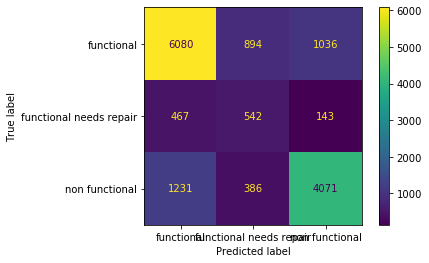

In [32]:
plot_confusion_matrix(kn, x_val_test,y_val_test)

In [34]:
params = {'weights': ['uniform','distance'],
    'p': [1,2],
    'algorithm': ['auto', 'kd_tree']}

In [35]:
kn_1_grid_search=GridSearchCV(kn,params,cv=3, return_train_score= True) #feel free to remove return_train_score


In [36]:
kn_1_grid_search.fit(X_tr_sm, y_tr_sm)

/opt/anaconda3/envs/water_well-env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/envs/water_well-env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/envs/water_well-env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/envs/water_well-env/lib/python3.6/site-packages/skle

KeyboardInterrupt: 